In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\User\\Desktop\\Customerseg\\archive\\housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
##Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df = df.drop(['longitude','latitude','ocean_proximity'], axis='columns')
df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [6]:
df.isnull().values.any()

True

In [7]:
df.isnull().sum()

housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [8]:
df.shape

(20640, 7)

In [9]:
df=df.dropna()

In [10]:
df.isnull().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [11]:
corr = df.corr()

<Axes: >

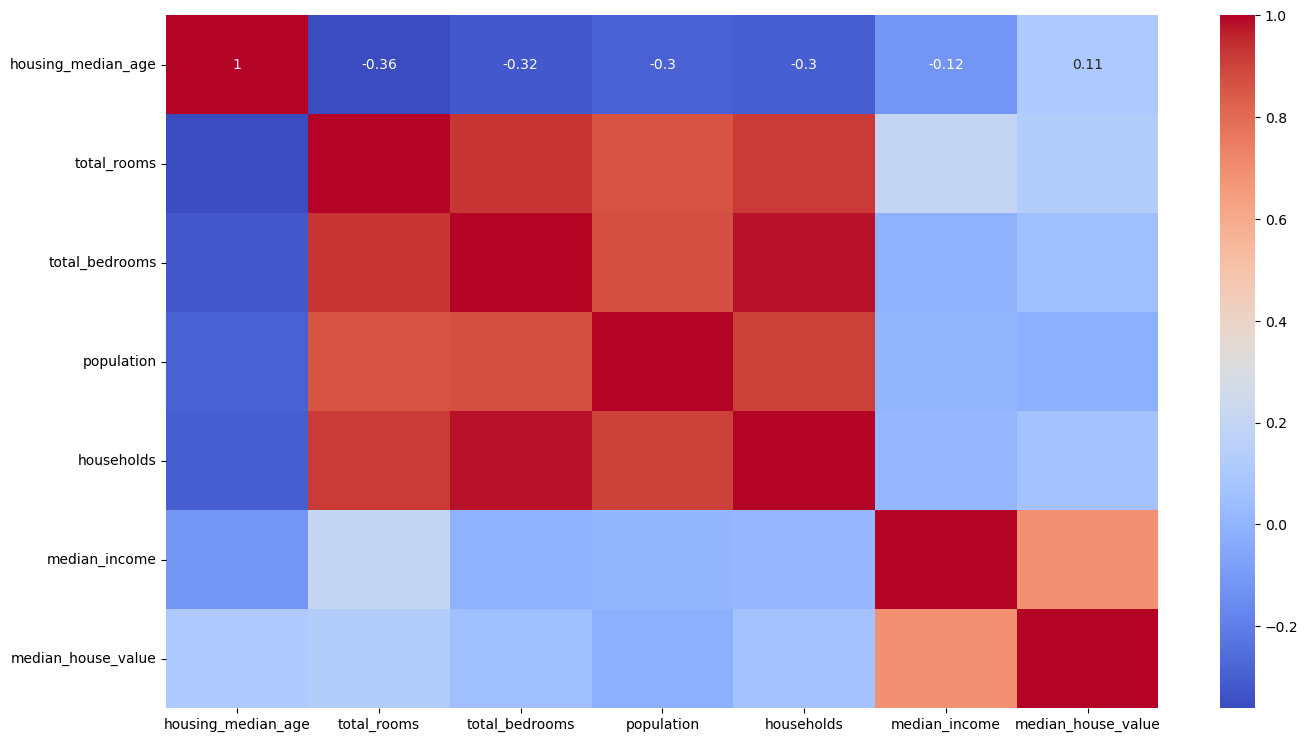

In [12]:
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot = True,cmap='coolwarm')

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(df)

array([[ 0.98216331, -0.8038126 , -0.97032521, ..., -0.97683327,
         2.34516291,  2.12881864],
       [-0.60621017,  2.0421302 ,  1.34827594, ...,  1.67037262,
         2.33263161,  1.31362603],
       [ 1.85576873, -0.53518928, -0.82556097, ..., -0.84342665,
         1.78293943,  1.25818254],
       ...,
       [-0.92388486, -0.17504183, -0.12547157, ..., -0.17377773,
        -1.14317103, -0.99247676],
       [-0.84446619, -0.35534437, -0.30583358, ..., -0.39350628,
        -1.05513604, -1.05831591],
       [-1.00330353,  0.06795473,  0.18541559, ...,  0.07995643,
        -0.78060586, -1.01759959]])

In [14]:
##Kmeans Clustering
#The Elbow Method

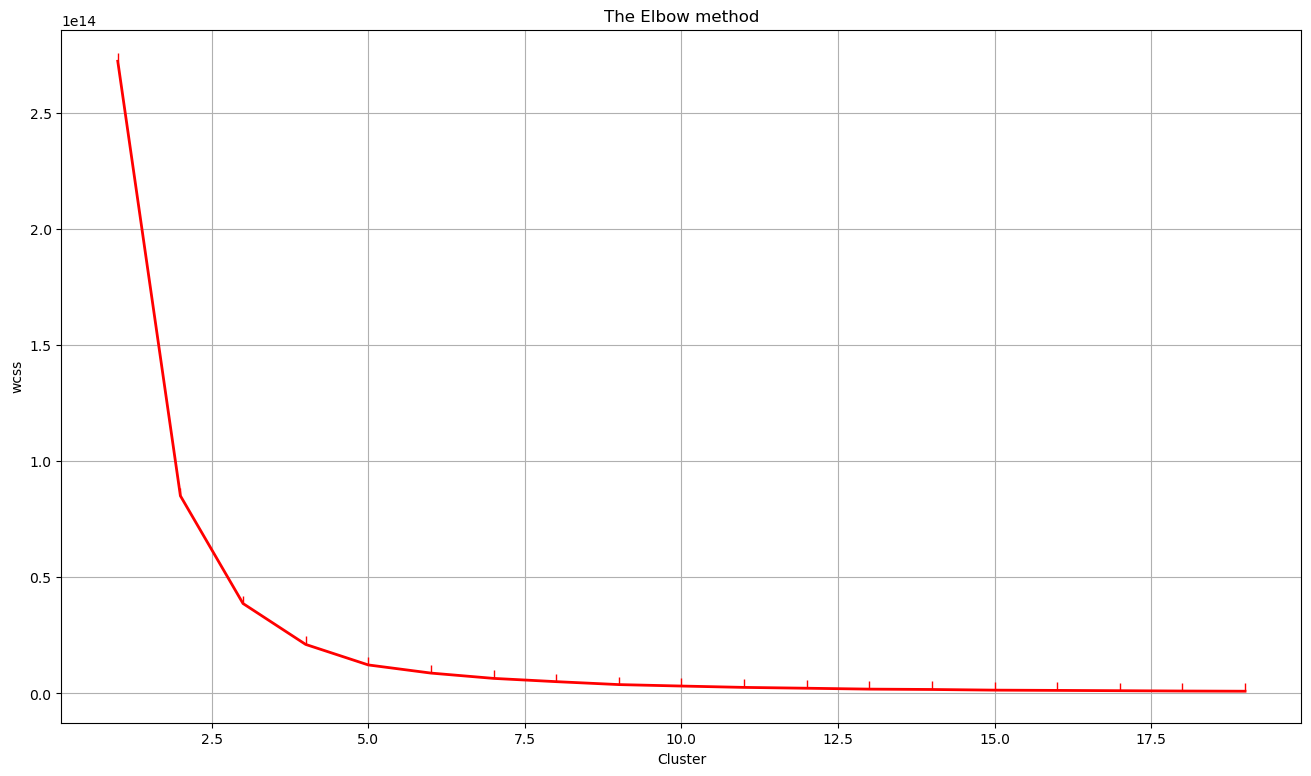

In [16]:
from sklearn.cluster import KMeans
wcss  = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i , init ="k-means++")
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (16,9))
plt.grid()
plt.plot(range(1,20),wcss,linewidth = 2,color = 'red', marker = 2)
plt.title('The Elbow method')
plt.xlabel('Cluster')
plt.ylabel('wcss')
plt.show()

In [18]:
kmeans = KMeans(n_clusters = 3,init = "k-means++",random_state = 0)

In [21]:
y_kmeans = kmeans.fit_predict(df)
y_kmeans

array([1, 1, 1, ..., 2, 2, 2])

In [22]:
y_kmeans.shape

(20433,)

In [24]:
y_kmeans = y_kmeans.reshape(len(y_kmeans),1)
y_kmeans.shape

(20433, 1)

In [26]:
x = np.concatenate([y_kmeans,df],axis=1)

In [28]:
df.columns


Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'median_house_value'],
      dtype='object')

In [29]:
final = pd.DataFrame(x,columns = ['ClusterNO','housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'median_house_value'])
final

,ClusterNO,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,1.0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,1.0,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,1.0,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,1.0,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,1.0,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...
20428,2.0,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20429,2.0,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20430,2.0,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20431,2.0,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [32]:
final.to_csv('segmented.csv')